In [16]:
import sys
import os
from importlib import reload
sys.path.insert(0, '/home/inesmcm/Desktop/projects/ocr-from-scratch/src')

from sklearn.model_selection import train_test_split

import model_definition
import bounding_boxes_utils
import utils
import model_train

reload(model_definition)
reload(bounding_boxes_utils)
reload(utils)
reload(model_train)

<module 'model_train' from '/home/inesmcm/Desktop/projects/ocr-from-scratch/src/model_train.py'>

In [2]:
label_path = '/home/inesmcm/Desktop/projects/ocr-from-scratch/data/boxes/gt_img_1.txt'
image_path = '/home/inesmcm/Desktop/projects/ocr-from-scratch/data/images/img_1.png'
image, label_matrix = utils.read(image_path, label_path)

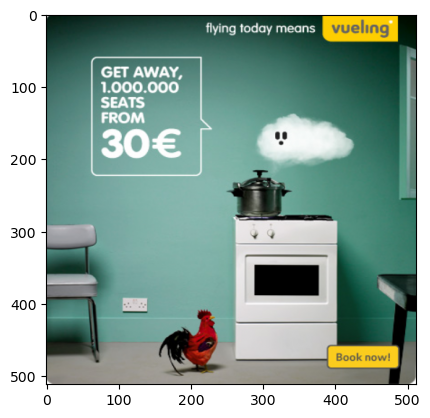

In [3]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [5]:
IMAGES_LIST_DIR = '/home/inesmcm/Desktop/projects/ocr-from-scratch/data/images'
LABELS_LIST_DIR = '/home/inesmcm/Desktop/projects/ocr-from-scratch/data/boxes'

image_list = sorted(os.listdir(IMAGES_LIST_DIR))

labels_list = sorted(os.listdir(LABELS_LIST_DIR))

In [6]:
images = {} # dict with name of input images
labels = {} # dict with name of output images

images['train'], images['validation'], labels['train'], labels['validation'] = train_test_split(image_list, labels_list, test_size = 0.25, shuffle = True)

In [17]:
model = model_definition.yolo()

In [18]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 256, 256, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 256, 256, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [73]:
history, model = model_train.train_model(model, IMAGES_LIST_DIR, LABELS_LIST_DIR, images, labels, batch_size = 4, epochs = 135)


Epoch 00000: Learning rate is 0.0100.
Epoch 1/135
(None, 15, 15, 1)
(None, 15, 15, 2)
(None, 15, 15, 8)
(None, 15, 15, 11)
(None, 15, 15, 1)
(None, 15, 15, 2)
(None, 15, 15, 8)
(None, 15, 15, 11)
